In [1]:
import gym # openAi gym
from gym import envs
import numpy as np 
import pandas as pd 
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
env = gym.make('Taxi-v3')   # Here you set the environment
env._max_episode_steps = 40000
env.reset()

123

In [45]:
def policy_evaluation(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Implement the policy evluation algorithm here given a policy and a complete model of the environment.
    
    
    Arguments:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: This is the minimum threshold for the error in two consecutive iteration of the value function.
        discount_factor: This is the discount factor - Gamma.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
#     Start with a random (all 0) value function
    V = np.zeros(env.nS)
    
    counter = 0
    
    while True:
        counter += 1
        delta = 0
        for s in range(env.nS):
            vNew = 0
            for a in range(env.nA):
                for prob, nextState, reward, done in env.P[s][a]:
                    vNew+=policy[s][a] * prob * (reward + discount_factor*V[nextState])
            
            delta = max(delta, np.abs(V[s]-vNew))
            V[s] = vNew
                
#         print(delta)
        if delta < theta:
            break

#     print(V)
#     print(counter)
    
    return np.array(V)


In [46]:
def policy_iteration(env, policy_eval_fn=policy_evaluation, discount_factor=1.0):
    """
    Implement the Policy Improvement Algorithm here which iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Arguments:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
    """
    def one_step_lookahead(state, V):
        """
        Implement the function to calculate the value for all actions in a given state.
        
        Arguments:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, nextState, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[nextState])

        return A


    # Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    
    numIterations = 0

    while True:
        numIterations += 1
        
        V = policy_eval_fn(policy, env, discount_factor)
        policyStable = True
        
        for s in range(env.nS):
            oldAction = np.argmax(policy[s])

            qValues = one_step_lookahead(s, V)
            newAction = np.argmax(qValues)

            if oldAction != newAction:
                policyStable = False
                        
            policy[s] = np.zeros([env.nA])
            policy[s][newAction] = 1

        if policyStable:
            print(numIterations)
            return policy, V
    
    return policy, np.zeros(env.env.nS)

In [47]:
env.reset()
policyPI, valuePI = policy_iteration(env, discount_factor=0.95)

12


In [48]:
print(policyPI)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [49]:
print(valuePI)

[184.61532028 115.74594772 146.66043063 122.8904623   70.05662325
 115.74594772  70.0566086   85.03759568 115.74596237  90.56590818
 146.66043063  96.38515752  79.78573908  90.56590818  79.78572443
 122.8904623  195.38455426 122.89047939 155.43204035 130.41102241
 174.38455426 108.95865034 138.3274091  115.74593919  74.79645213
 122.89047939  74.79643821  90.56589965 108.95866425  85.03761277
 138.3274091   90.56589965  85.03762669  96.38517461  85.03761277
 130.41102241 184.61532655 130.41103864 146.66043833 138.32740099
 130.41105186  79.78573213 102.51071782  85.03760466 102.51073104
 164.66531333 102.51071782 122.89047129 102.51073104  79.78573213
 130.41103864  85.03760466  90.5659291  102.51071782  90.56591588
 138.32740099 138.32742897 174.38454766 138.32741641 146.66043063
 122.89049927  74.79644553  96.38518193  79.78572443 108.95867021
 174.38454766 108.95865765 130.41103094  96.38519449  74.79644553
 122.89048671  79.78572443  96.38519449 108.95865765  96.38518193
 146.66043

In [50]:
def value_iteration(env, theta=0.00001, discount_factor=1.0):
    """
    This section is for Value Iteration Algorithm.
    
    Arguments:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: Stop evaluation once value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.        
    """
    
    def one_step_lookahead(state, V):
        """
        Function to calculate the value for all actions in a given state.
        
        Arguments:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.env.nA)
        for a in range(env.nA):
            for prob, nextState, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[nextState])

        return A
    
    V = np.zeros(env.env.nS)
    
    numIterations = 0
    
    while True:
        numIterations += 1
        delta = 0
        
        for s in range(env.nS):
            qValues = one_step_lookahead(s, V)
            newValue = np.max(qValues)
            
            delta = max(delta, np.abs(newValue - V[s]))
            V[s] = newValue
        
        if delta < theta:
            break
    
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):  #for all states, create deterministic policy
        qValues = one_step_lookahead(s,V)
        
        newAction = np.argmax(qValues)
        policy[s][newAction] = 1
    
    print(numIterations)    
    return policy, V

In [53]:
env.reset()
policyVI,valueVI = value_iteration(env, discount_factor=0.95)

146


In [54]:
print(policyVI)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [55]:
print(valueVI)

[184.61532028 115.74594772 146.66043063 122.8904623   70.05662325
 115.74594772  70.0566086   85.03759568 115.74596237  90.56590818
 146.66043063  96.38515752  79.78573908  90.56590818  79.78572443
 122.8904623  195.38455426 122.89047939 155.43204035 130.41102241
 174.38455426 108.95865034 138.3274091  115.74593919  74.79645213
 122.89047939  74.79643821  90.56589965 108.95866425  85.03761277
 138.3274091   90.56589965  85.03762669  96.38517461  85.03761277
 130.41102241 184.61532655 130.41103864 146.66043833 138.32740099
 130.41105186  79.78573213 102.51071782  85.03760466 102.51073104
 164.66531333 102.51071782 122.89047129 102.51073104  79.78573213
 130.41103864  85.03760466  90.5659291  102.51071782  90.56591588
 138.32740099 138.32742897 174.38454766 138.32741641 146.66043063
 122.89049927  74.79644553  96.38518193  79.78572443 108.95867021
 174.38454766 108.95865765 130.41103094  96.38519449  74.79644553
 122.89048671  79.78572443  96.38519449 108.95865765  96.38518193
 146.66043

## Policise are same for Policy Iteration and Value Iteration 

In [56]:
samePolicy = True
for s in range(env.nS):
    if samePolicy == False:
        break
    for a in range(env.nA):
        if policyPI[s][a] != policyVI[s][a]:
            samePolicy=False
            break

if samePolicy:
    print("Same Policy")
else:
    print("Not Same Policy")

Same Policy


## Distribution of number of steps

In [39]:
# Use the following function to see the rendering of the final policy output in the environment
def view_policy(policy):
    curr_state = env.reset()
    counter = 0
    reward = None
    while reward != 20:
        state, reward, done, info = env.step(np.argmax(policy[curr_state])) 
        curr_state = state
        counter += 1
        env.env.s = curr_state
        env.render()
    
    return counter

In [40]:
import matplotlib.pyplot as plt

In [41]:
polCounter = [view_policy(policyPI) for i in range(1000)]

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y|

  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R:_| : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | 

  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_|

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |

  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | 

  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| 

  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| |

  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_

  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| |

In [46]:
np.average(polCounter)

13.097

Text(0, 0.5, 'Number of Steps')

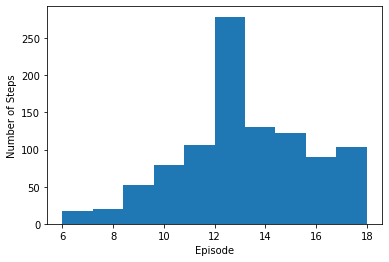

In [47]:
plt.hist(polCounter) 
plt.xlabel('Episode') 
plt.ylabel('Number of Steps') 

# Q Learning

In [24]:
def Q_learning_train(env,alpha,gamma,epsilon,episodes): 
    """Q Learning Algorithm with epsilon greedy policy

    Arguments:
        env: Environment 
        alpha: Learning Rate --> Extent to which our Q-values are being updated in every iteration.
        gamma: Discount Rate --> How much importance we want to give to future rewards
        epsilon: Probability of selecting random action instead of the 'optimal' action
        episodes: No. of episodes to train 

    Returns:
        Q-learning Trained policy

    """
    
    """Training the agent"""

    
    #Initialize Q table here
    q_table = np.zeros([env.observation_space.n, env.action_space.n]) 
    
    epRewards = np.zeros(episodes)
    
    for i in range(episodes):
        state = env.reset()
        
        reward=0
        totalReward = 0
        
        while reward != 20:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 5)
            else:
                action = np.argmax(q_table[state])
                
            observation, reward, done, info = env.step(action)
            totalReward += reward
            
            oldValue = q_table[state, action]
            nextValue = np.max(q_table[observation])
            
            newValue = (1-alpha) * oldValue + alpha * (reward + gamma * nextValue)
            
            q_table[state, action] = newValue
            
            state = observation
            
        epRewards[i] = totalReward

       # Start with a random policy
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    for state in range(env.env.nS):  
        policy[state] = np.zeros([env.nA])
        newAction = np.argmax(q_table[state])
        policy[state][newAction] = 1
        
    
    
    return policy, q_table, epRewards

In [57]:
env.reset()
policyQL, qTableQL, epRewards = Q_learning_train(env, 0.1, 0.95,0.1,1000)

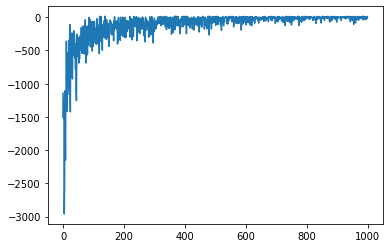

In [58]:
import matplotlib.pyplot as plt
plt.plot(epRewards, linestyle='solid') # plotting by columns
plt.show()

In [125]:
print(policyQL)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [127]:
print(qTableQL)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 2.75200369  3.94947757  2.75200369  3.94947757  5.20997639 -5.05052243]
 [ 7.93349184  9.40367562  7.93349184  9.40367562 10.9512375   0.40367562]
 ...
 [ 5.84192925 12.58025     3.07169656  2.41584318 -2.05926    -0.5270239 ]
 [ 1.03339008  6.53681725  1.8559687   1.7047841  -3.85624809 -4.50818488]
 [13.91225068 11.25517818 12.67797102 18.          6.45592314  6.49011464]]
